## Training CNN Model ##
#### Using only the heart beat with a single non moving frequency ####


### Load the Common Imports ###

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import Input as Input
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D
from keras.models import Sequential
from keras.layers import Dropout
from keras import layers
from keras.layers import BatchNormalization
import h5py

print(keras.__version__)

2.4.3


# Load Mat Files


In [13]:
f = h5py.File('ML_genTrain_fs10k_1.mat','r')
arrays = {}

for k, v in f.items():
    arrays[k] = np.array(v)

    
    


In [23]:
print(arrays.keys())
print(datOut.shape)
print(datLabels.shape)

dict_keys(['datOut', 'fhActual', 'frActual', 't'])
(10000, 20001)
(10000, 1)


### Load the Dataset ###

In [24]:

datOut= arrays['datOut']
datLabels = arrays['fhActual']

tNum = datOut.shape[0]


maxFreq = 1


firstLayerLength = 10000 #Length of the Model input, should not matter if data is correct length (1second at fs = 2k)
percentTrain = .9; #What percentange will be used to train (Reamining is test (10% test in this case))

trainEndEx = round(tNum*percentTrain) #Find out what index coresponds to 90% of the training data

x_train = datOut[0:trainEndEx,0:firstLayerLength] #Add training phase data to seperate array
y_train = datLabels[0:trainEndEx] / maxFreq #Add training labels to vector

x_test = datOut[trainEndEx+1:,0:firstLayerLength] #Add testing phase data to array
y_test = datLabels[trainEndEx+1:]/maxFreq #Add testting labels to vector





# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


print('x_test shape: ',x_test.shape)
print('x_train shape: ',x_train.shape)

print('y_test shape: ',y_test.shape)
print('y_train shape: ',y_train.shape)




print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')




x_test shape:  (999, 10000)
x_train shape:  (9000, 10000)
y_test shape:  (999, 1)
y_train shape:  (9000, 1)
9000 train samples
999 test samples


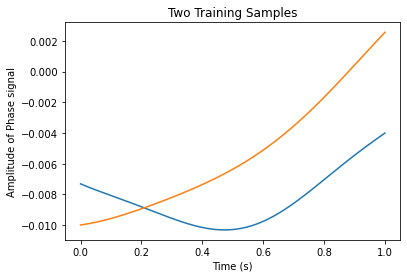

[1.377307]


In [25]:
x = 50
t = np.arange(0,1,1/10000)
t = t[0:firstLayerLength]

plt.plot(t,x_train[x,:],t,x_train[1,:]) #Plot two training sample at random to verify output
plt.ylabel('Amplitude of Phase signal')
plt.xlabel('Time (s)')
plt.title('Two Training Samples')
plt.show()
print(y_train[x])

# Set up Model


In [26]:
#Create model in spec to the prior research
model = Sequential()
model.add(Input(shape=(x_train.shape[1], )))

model.add(Dense(2,input_shape  = (x_train.shape[1],)))
model.add(Dense(2))
model.add(Dense(3))
model.add(Dense(1))

In [27]:

#set up optimizer and set the metric to MSE
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Nadam(learning_rate=0.001)
,
                  metrics=[keras.metrics.MeanSquaredError()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 20002     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 20,021
Trainable params: 20,021
Non-trainable params: 0
_________________________________________________________________


### Convert class vectors to binary class matrices ###

This is the one to use with the `categorical_crossentropy` loss.

In [47]:
batch_size = 100  # Set the batch size
epochs = 100 # Set the number of epochs

print(model.inputs[0].dtype)


<dtype: 'float32'>


### Train the Model ###

In [48]:
# One Hidden Layer
initializer = keras.initializers.RandomNormal(mean=0., stddev=5.)

hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.18,
          callbacks=None)



score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
74/74 [==============================] - 2s 28ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 2/100
74/74 [==============================] - 2s 24ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 3/100
74/74 [==============================] - 2s 26ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 4/100
74/74 [==============================] - 2s 29ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 5/100
74/74 [==============================] - 2s 26ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 6/100
74/74 [==============================] - 2s 31ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 7/100
74/74 [=========

Epoch 50/100
74/74 [==============================] - 2s 31ms/step - loss: 9.8818e-04 - mean_squared_error: 9.8818e-04 - val_loss: 7.0089e-04 - val_mean_squared_error: 7.0089e-04
Epoch 51/100
74/74 [==============================] - 2s 31ms/step - loss: 6.5719e-04 - mean_squared_error: 6.5719e-04 - val_loss: 5.6242e-04 - val_mean_squared_error: 5.6242e-04
Epoch 52/100
74/74 [==============================] - 1s 20ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 5.9320e-04 - val_mean_squared_error: 5.9320e-04
Epoch 53/100
74/74 [==============================] - 2s 24ms/step - loss: 6.8018e-04 - mean_squared_error: 6.8018e-04 - val_loss: 6.8078e-04 - val_mean_squared_error: 6.8078e-04
Epoch 54/100
74/74 [==============================] - 3s 35ms/step - loss: 7.1124e-04 - mean_squared_error: 7.1124e-04 - val_loss: 5.9188e-04 - val_mean_squared_error: 5.9188e-04
Epoch 55/100
74/74 [==============================] - 2s 32ms/step - loss: 6.7503e-04 - mean_squared_error: 6.750

74/74 [==============================] - 2s 26ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 9.2442e-04 - val_mean_squared_error: 9.2442e-04
Epoch 98/100
74/74 [==============================] - 2s 31ms/step - loss: 6.6483e-04 - mean_squared_error: 6.6483e-04 - val_loss: 8.7611e-04 - val_mean_squared_error: 8.7611e-04
Epoch 99/100
74/74 [==============================] - 3s 34ms/step - loss: 8.9577e-04 - mean_squared_error: 8.9577e-04 - val_loss: 5.5076e-04 - val_mean_squared_error: 5.5076e-04
Epoch 100/100
74/74 [==============================] - 2s 32ms/step - loss: 6.1972e-04 - mean_squared_error: 6.1972e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Test loss: 0.0011346034007146955
Test accuracy: 0.0011346034007146955


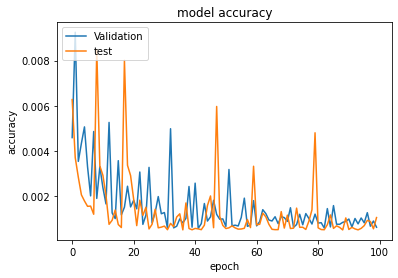

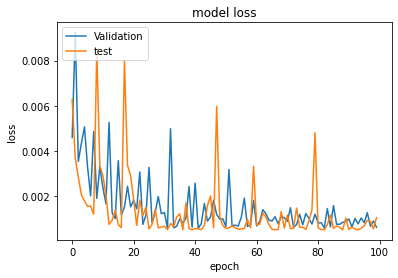

In [49]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Validation', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Validation', 'test'], loc='upper left')
plt.show()


In [32]:
print(hist.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


In [43]:
fEst = model.predict(x_test)

print(fEst.shape)
print(y_test.shape)

(999, 1)
(999, 1)


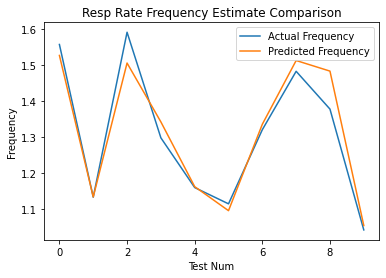

In [50]:
x = 500
numShow = 10
t = np.arange(0,numShow,1)
plt.plot(t,y_test[x:x+numShow], t, fEst[x:x+numShow,0])
plt.ylabel('Frequency')
plt.xlabel('Test Num')
plt.legend(['Actual Frequency','Predicted Frequency'])
plt.title('Resp Rate Frequency Estimate Comparison')
plt.show()


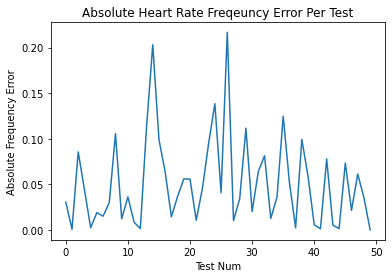

In [51]:
x = 500
numShow = 50
t = np.arange(0,numShow,1)
plt.plot(t,np.abs(y_test[x:x+numShow,0] - fEst[x:x+numShow,0]))
plt.ylabel('Absolute Frequency Error')
plt.xlabel('Test Num')
plt.title('Absolute Heart Rate Freqeuncy Error Per Test')
plt.show()

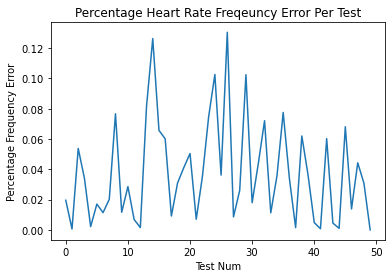

In [52]:
x = 500
numShow = 50
t = np.arange(0,numShow,1)
plt.plot(t,np.abs(y_test[x:x+numShow,0] -fEst[x:x+numShow,0])/y_test[x:x+numShow,0])
plt.ylabel('Percentage Frequency Error')
plt.xlabel('Test Num')
plt.title('Percentage Heart Rate Freqeuncy Error Per Test')
plt.show()